In [7]:
# declare 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
# suicide dataframe
sd = pd.read_csv('data/master.csv', index_col= 0)
sd.head(10)

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Australia,2000,male,15-24 years,271.0,1333011.0,20.33,Australia2000,0.898,"415,034,227,218",232,Generation X
Australia,2000,female,15-24 years,78.0,1285283.0,6.07,Australia2000,0.898,"415,034,227,218",232,Generation X
Australia,2001,male,15-24 years,280.0,1351444.0,20.72,Australia2001,NaN,"378,215,090,694",20860,Millenials
Australia,2001,female,15-24 years,63.0,1303713.0,4.83,Australia2001,NaN,"378,215,090,694",20860,Millenials
Australia,2002,male,15-24 years,246.0,1372770.0,17.92,Australia2002,NaN,"394,486,709,920",21474,Millenials
Australia,2002,female,15-24 years,58.0,1316527.0,4.41,Australia2002,NaN,"394,486,709,920",21474,Millenials
Australia,2003,male,15-24 years,243.0,1394989.0,17.42,Australia2003,NaN,"466,294,700,058",25059,Millenials
Australia,2003,female,15-24 years,48.0,1333189.0,3.60,Australia2003,NaN,"466,294,700,058",25059,Millenials
Australia,2004,male,15-24 years,205.0,1420482.0,14.43,Australia2004,NaN,61,32454,Millenials


In [9]:
# happiness dataframe
# clean 2017 table first
hp = pd.read_csv('data/2017.csv', index_col = 0)


hp = pd.DataFrame(hp["Happiness.Score"])
hp.head(12) 

,Happiness.Score
Country,
Norway,7.537
Denmark,7.522
Iceland,7.504
Switzerland,7.494
Finland,7.469
Netherlands,7.377
Canada,7.316
New Zealand,7.314
Sweden,7.284


In [10]:
#Group data by age 
gsda=pd.DataFrame(sd.groupby(['age','year'])['suicides_no'].sum().unstack())
gsda = gsda.fillna(0)
gsda

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
age,,,,,,,,,,,,,,,,,
05-14 years,78.0,57.0,63.0,55.0,71.0,61.0,65.0,74.0,59.0,64.0,44.0,75.0,79.0,78.0,40.0,39.0,0.0
15-24 years,1560.0,1501.0,1438.0,1434.0,1439.0,1126.0,1403.0,1384.0,1299.0,1416.0,1444.0,1523.0,1543.0,1470.0,866.0,865.0,224.0
25-34 years,2144.0,2193.0,2132.0,1889.0,1732.0,1393.0,1674.0,1732.0,1637.0,1676.0,1656.0,1786.0,1347.0,1810.0,1129.0,1164.0,392.0
35-54 years,5309.0,5500.0,5271.0,4810.0,4980.0,4377.0,4790.0,4755.0,5129.0,5298.0,5138.0,4860.0,5159.0,4924.0,3360.0,3168.0,973.0
55-74 years,2632.0,2745.0,2866.0,2807.0,2804.0,2194.0,3122.0,2907.0,3145.0,3007.0,3263.0,2996.0,2907.0,3689.0,2273.0,2444.0,993.0
75+ years,1110.0,1189.0,1169.0,1138.0,1164.0,1058.0,1195.0,1012.0,971.0,1110.0,1087.0,1047.0,1109.0,1248.0,819.0,968.0,356.0


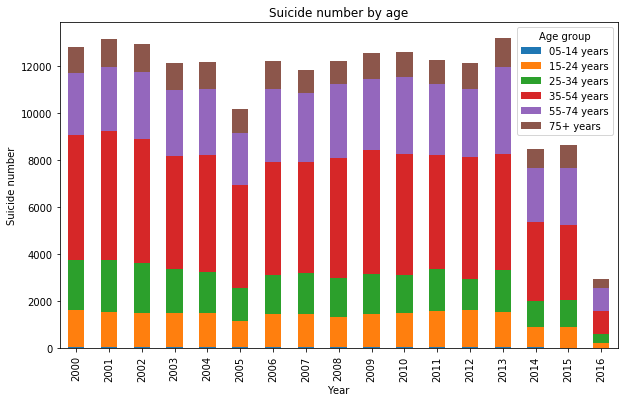

In [11]:
#Total suicide number by age
Tgsda = gsda.T
Tgsda.iloc[:,:].plot(kind='bar',stacked = True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1,1), title = 'Age group')
plt.title('Suicide number by age')
plt.xlabel('Year')
plt.ylabel('Suicide number')

plt.savefig('image/SDbyAge')


In [13]:
#Group data by age,gender of each year. Cleans NA out of table
gsdg = pd.DataFrame(sd.groupby(['age','sex','year'])['suicides_no'].sum().unstack())
gsdg = gsdg.fillna(0)
gsdg

year                  2000    2001    2002    2003    2004    2005    2006  \
age         sex                                                              
05-14 years female    23.0    28.0    27.0    28.0    26.0    36.0    33.0   
            male      55.0    29.0    36.0    27.0    45.0    25.0    32.0   
15-24 years female   319.0   311.0   318.0   327.0   339.0   307.0   313.0   
            male    1241.0  1190.0  1120.0  1107.0  1100.0   819.0  1090.0   
25-34 years female   356.0   429.0   443.0   424.0   358.0   332.0   416.0   
            male    1788.0  1764.0  1689.0  1465.0  1374.0  1061.0  1258.0   
35-54 years female  1341.0  1396.0  1334.0   910.0  1246.0  1188.0  1121.0   
            male    3968.0  4104.0  3937.0  3900.0  3734.0  3189.0  3669.0   
55-74 years female   780.0   791.0   832.0   792.0   818.0   616.0   896.0   
            male    1852.0  1954.0  2034.0  2015.0  1986.0  1578.0  2226.0   
75+ years   female   315.0   367.0   353.0   374.0   354.0   331.0   350.0   
            male     795.0   822.0   816.0   764.0   810.0   727.0   845.0   

year                  2007    2008    2009    2010    2011    2012    2013  \
age         sex                                                              
05-14 years female    27.0    23.0    30.0    23.0    38.0    39.0    35.0   
            male      47.0    36.0    34.0    21.0    37.0    40.0    43.0   
15-24 years female   350.0   254.0   354.0   356.0   409.0   427.0   444.0   
            male    1034.0  1045.0  1062.0  1088.0  1114.0  1116.0  1026.0   
25-34 years female   387.0   414.0   314.0   462.0   415.0   420.0   438.0   
            male    1345.0  1223.0  1362.0  1194.0  1371.0   927.0  1372.0   
35-54 years female  1091.0  1321.0  1321.0  1306.0  1255.0  1361.0  1370.0   
            male    3664.0  3808.0  3977.0  3832.0  3605.0  3798.0  3554.0   
55-74 years female   862.0   922.0   637.0   883.0   857.0   949.0   979.0   
            male    2045.0  2223.0  2370.0  2380.0  2139.0  1958.0  2710.0   
75+ years   female   353.0   325.0   281.0   272.0   267.0   267.0   312.0   
            male     659.0   646.0   829.0   815.0   780.0   842.0   936.0   

year                  2014    2015   2016  
age         sex                            
05-14 years female    25.0    26.0    0.0  
            male      15.0    13.0    0.0  
15-24 years female   242.0   237.0   71.0  
            male     624.0   628.0  153.0  
25-34 years female   193.0   215.0  111.0  
            male     936.0   949.0  281.0  
35-54 years female   909.0   885.0  218.0  
            male    2451.0  2283.0  755.0  
55-74 years female   508.0   746.0  315.0  
            male    1765.0  1698.0  678.0  
75+ years   female   253.0   258.0  132.0  
            male     566.0   710.0  224.0

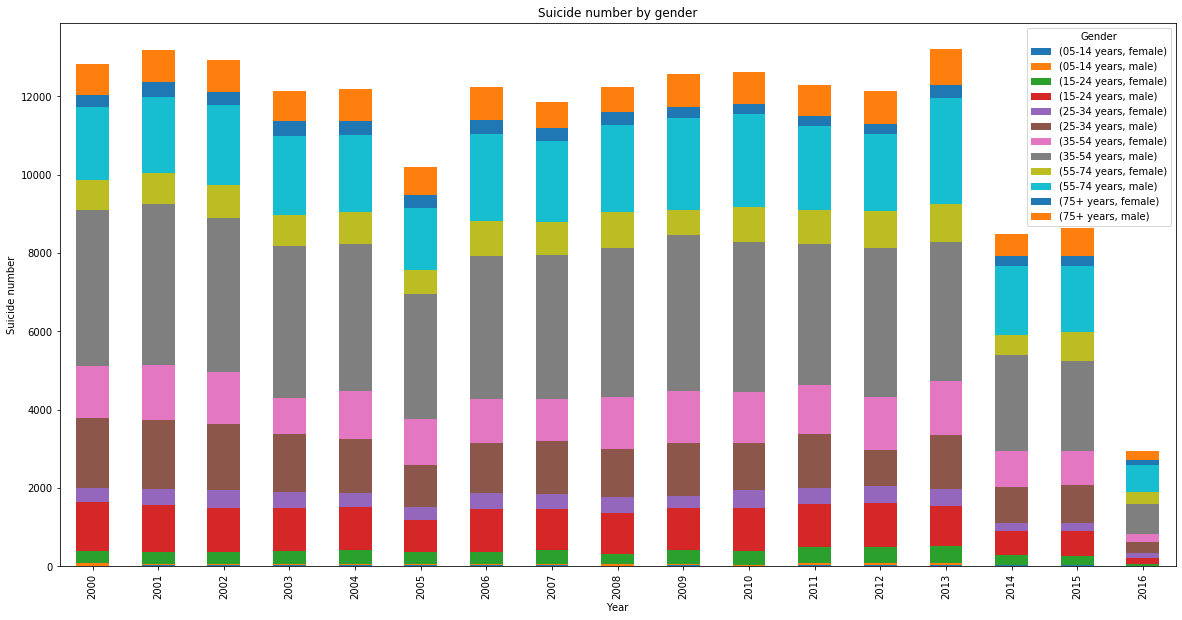

In [16]:
# Total suicides by gender
tgsdg = gsdg.T
tgsdg.iloc[:,:].plot(kind='bar',stacked=True,figsize=(20,10))
plt.legend(bbox_to_anchor=(1,1), title= 'Gender')
plt.title('Suicide number by gender')
plt.xlabel('Year')
plt.ylabel('Suicide number')

plt.savefig('image/SDbyGender')

In [21]:
#Group data by country of each year. Cleans NA out of table
gsdc = pd.DataFrame(sd.groupby(['country','year'])['suicides_no'].sum().unstack())
gsdc = gsdc.fillna(0) 
gsdc

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,
Australia,2391.0,2458.0,2319.0,1961.0,2114.0,0.0,1922.0,2012.0,2341.0,2337.0,2420.0,2392.0,2580.0,2608.0,2773.0,2903.0,0.0
Canada,3488.0,3694.0,3650.0,3746.0,3613.0,3724.0,3512.0,3611.0,3395.0,3580.0,3932.0,3728.0,3511.0,4054.0,0.0,0.0,0.0
Denmark,728.0,727.0,688.0,614.0,642.0,631.0,650.0,581.0,603.0,622.0,563.0,589.0,642.0,610.0,629.0,564.0,0.0
Finland,1165.0,1204.0,1095.0,1075.0,946.0,800.0,1043.0,995.0,1033.0,1034.0,836.0,721.0,678.0,693.0,789.0,541.0,0.0
Iceland,50.0,36.0,30.0,26.0,35.0,33.0,32.0,37.0,38.0,36.0,46.0,27.0,37.0,49.0,44.0,40.0,40.0
Netherlands,1501.0,1474.0,1570.0,1309.0,1514.0,1574.0,1525.0,1354.0,1321.0,1530.0,1604.0,1650.0,1440.0,1856.0,1642.0,1873.0,1886.0
New Zealand,458.0,508.0,467.0,519.0,476.0,514.0,527.0,494.0,520.0,512.0,536.0,436.0,549.0,494.0,0.0,0.0,0.0
Norway,541.0,549.0,494.0,502.0,529.0,533.0,532.0,485.0,505.0,573.0,548.0,598.0,515.0,554.0,548.0,472.0,0.0
Sweden,1131.0,1197.0,1180.0,1112.0,1155.0,1219.0,1197.0,1126.0,1170.0,1242.0,1141.0,1112.0,1154.0,1230.0,1030.0,1182.0,1012.0


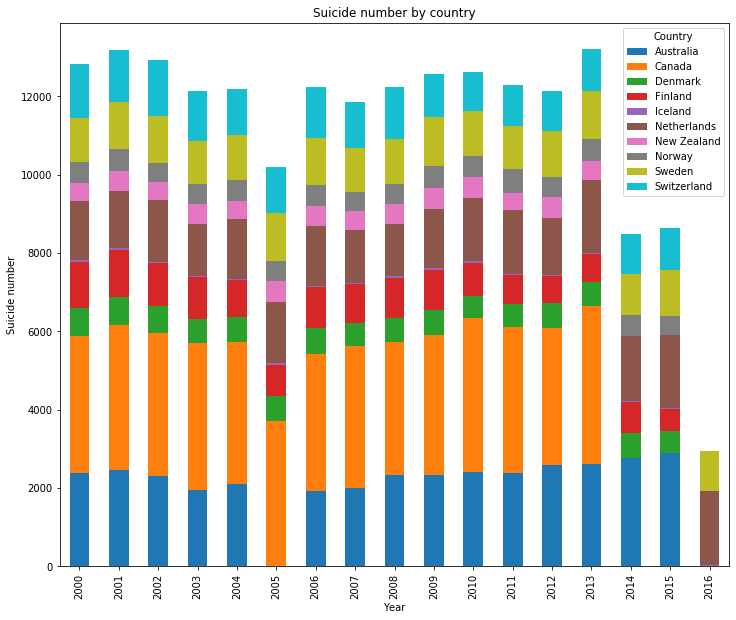

In [24]:
# Total suicides by country
tgsdc = gsdc.T
tgsdc.iloc[:,:].plot(kind='bar',stacked=True,figsize=(12,10))
plt.legend(bbox_to_anchor=(1,1), title= 'Country')
plt.title('Suicide number by country')
plt.xlabel('Year')
plt.ylabel('Suicide number')

plt.savefig('image/SDbyCountry')

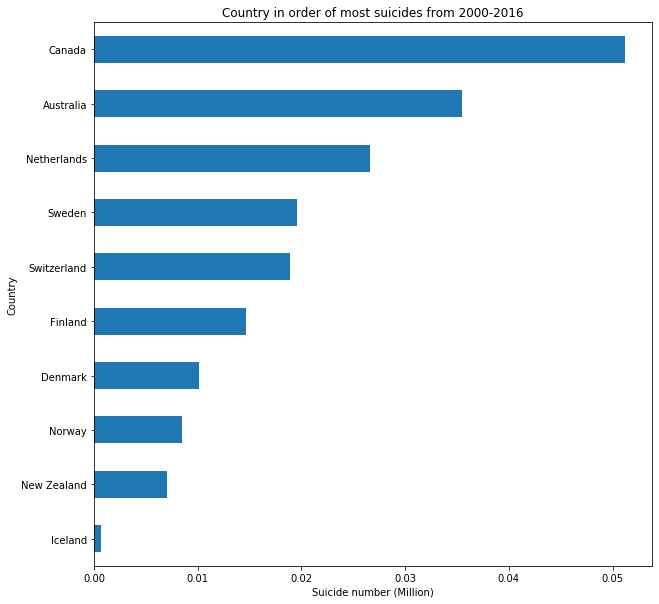

In [29]:
#group by country
gsdcountry = (pd.DataFrame(sd.groupby(['country','sex'])['suicides_no'].sum().unstack()))/1000000
gsdcountry['Suicide number'] =gsdcountry.apply(lambda gsdcountry: gsdcountry['female']+gsdcountry['male'],axis =1)
gsdcountry = gsdcountry.sort_values(by='Suicide number', ascending=True)
# gsdcountry.head(10)

gsdcountry.iloc[0:10,2].plot(kind='barh',figsize=(10,10))
plt.ylabel('Country')
plt.xlabel('Suicide number (Million)')
plt.title('Country in order of most suicides from 2000-2016')

plt.savefig('image/SDbyOrder')

In [26]:
#Happiness score vs suicide
hpvssd = pd.concat([hp,gsdcountry],axis=1,join='inner')

hpvssd 





,Happiness.Score,female,male,Suicide number
Norway,7.537,0.002465,0.006013,0.008478
Denmark,7.522,0.002721,0.007362,0.010083
Iceland,7.504,0.000151,0.000485,0.000636
Switzerland,7.494,0.005573,0.013358,0.018931
Finland,7.469,0.003845,0.010803,0.014648
Netherlands,7.377,0.008259,0.018364,0.026623
Canada,7.316,0.011925,0.039313,0.051238
New Zealand,7.314,0.001696,0.005314,0.007010
Sweden,7.284,0.005679,0.013911,0.019590
Australia,7.284,0.007578,0.027953,0.035531
